### IDs:
Insert yours IDs to the cell below

ID #1: 305674731

ID #2: 204879100


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Imports:

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd
import scipy.special as special
from scipy.stats import norm
import scipy.stats as stats
from scipy.stats import binom
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Question 1 - Data exploration and visialization - practical

Load `Diabetes` dataset from sklearn.
Explore the data. Follow the instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. Describe the dataset. How many samples does it contain? How many features? What is the data type for each variable?
2. Produce a histogram and a boxplot of all the features.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot).
5. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point.

### Answers:

### 1.1

### Load the dataset:

In [ ]:
# Load the diabetes dataset
diabetes_data = load_diabetes()

### Describe the dataset:

In [ ]:
print(diabetes_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### The Diabetes dataset contains 442 samples and 10 features and the data type for each variable is float64.

### The features are:
- 'age'(age in years)
- 'sex' (male or female)
- 'bmi' (body mass index)
- 'bp' (average blood pressure)
- 's1' (TC: total serum cholesterol)
- 's2' (LDL: low-density lipoproteins)
- 's3' (HDL: high-density lipoproteins)
- 's4' (TCH: total cholesterol / HDL)
- 's5' (LTG: possibly log of serum triglycerides level)
- 's6' (GLU: blood sugar level)

One target variable: a quantitative measure of disease progression one year after baseline.

The data type for target: integer 25 - 346.

Each of the 10 feature variables have been mean centered and scaled by the standard deviation times the square root of the number of sample (ie the sum of squares of each column totals 1).

### Creating a dataframe:

In [ ]:
df_diabetes = pd.DataFrame(data=diabetes_data['data'], columns=diabetes_data['feature_names'])
df_diabetes['target'] = diabetes_data['target']
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### 1.2

### Produce a histogram and a boxplot of all the features:

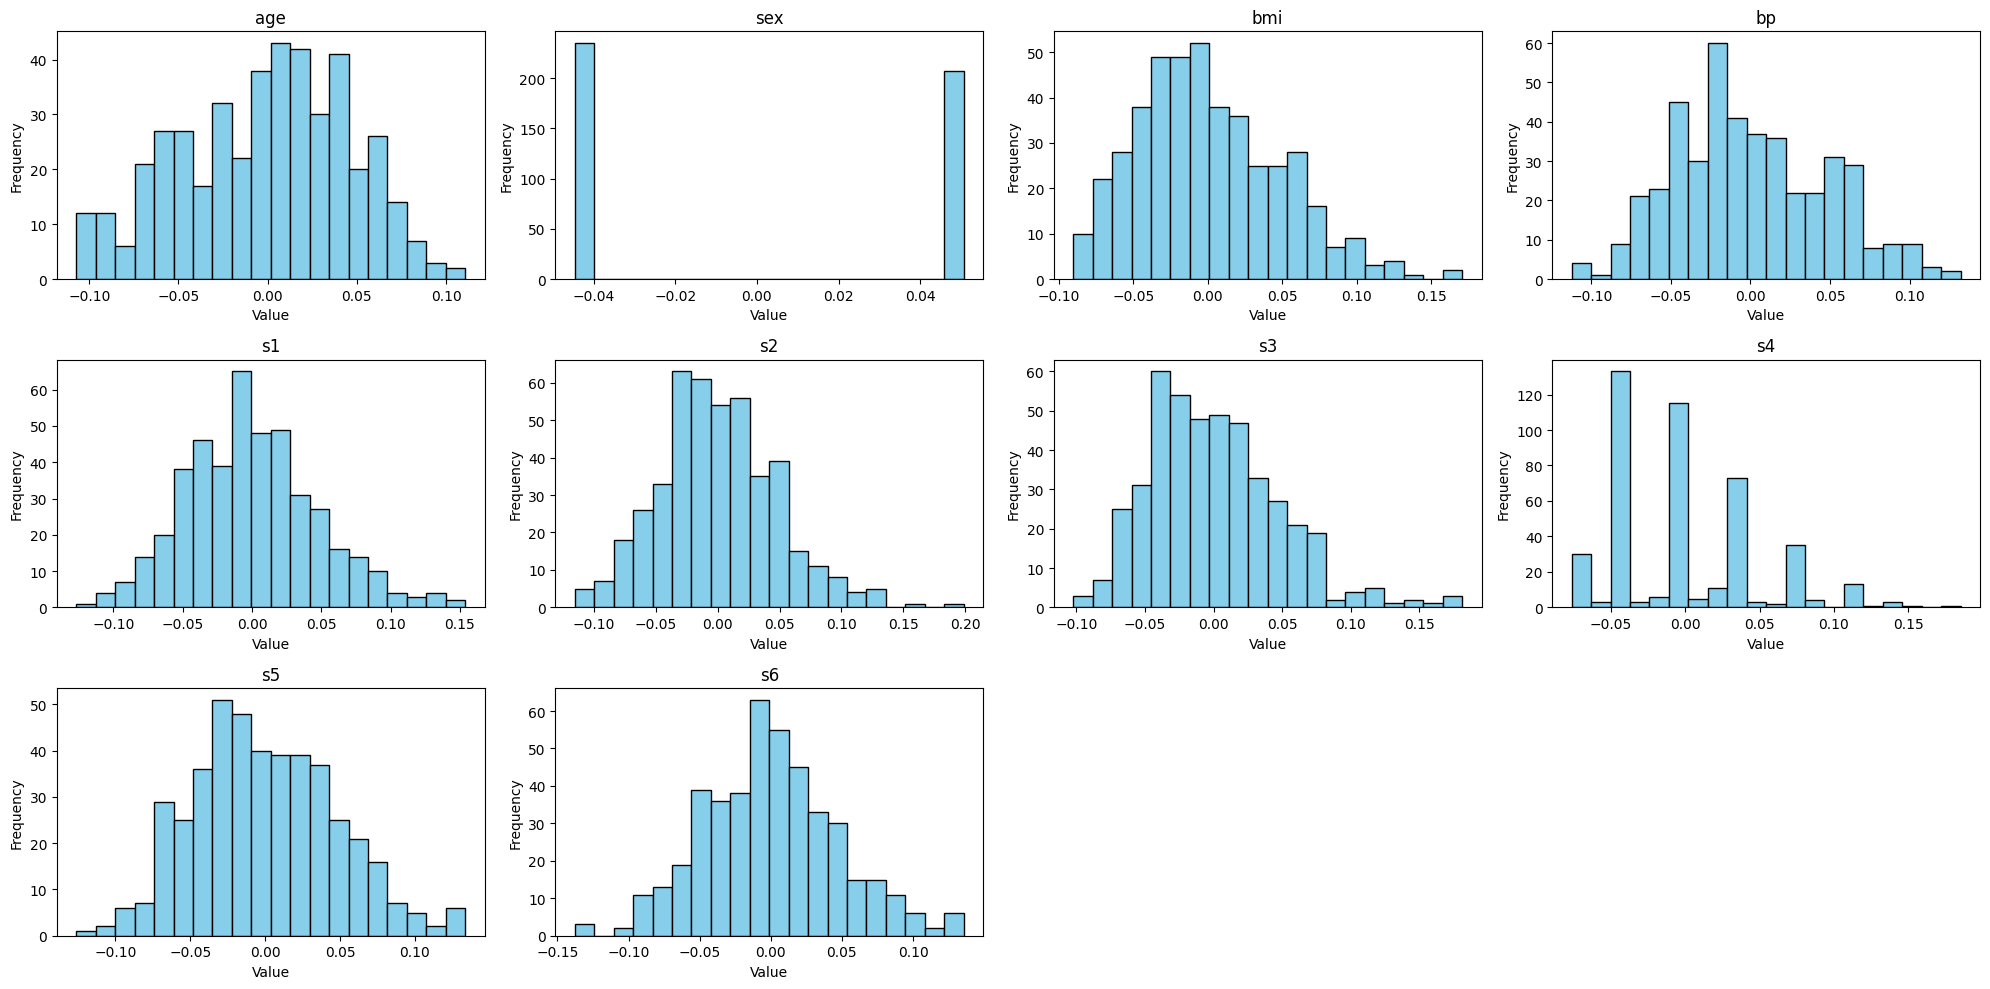

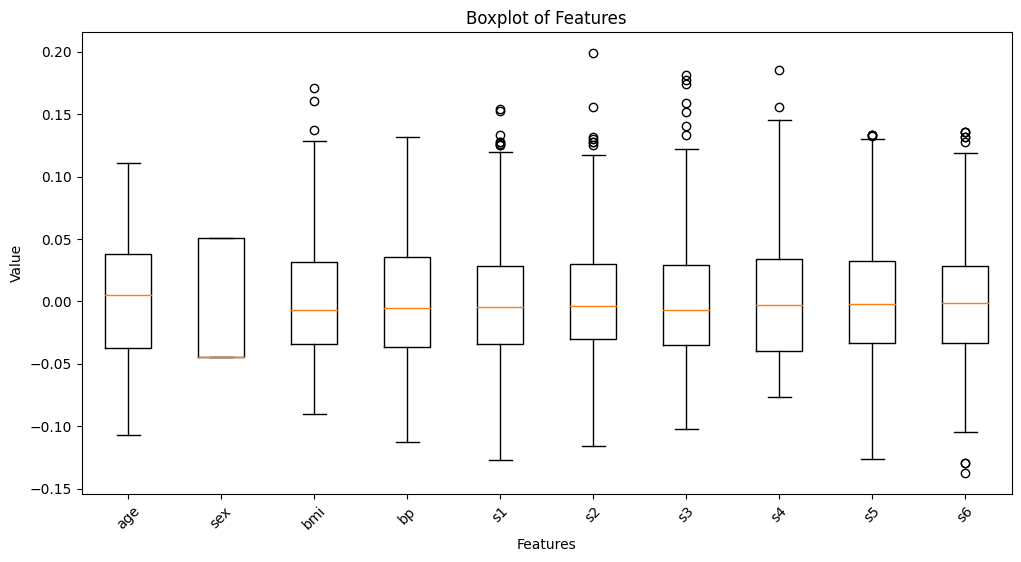

In [ ]:
# Plotting histograms for all features
plt.figure(figsize=(20, 10))
for i, feature in enumerate(diabetes_data['feature_names']):
    plt.subplot(3, 4, i+1)
    df_diabetes[feature].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(False)

plt.tight_layout()
plt.show()

# Plotting boxplot for all features together
plt.figure(figsize=(12, 6))
plt.boxplot([df_diabetes[feature] for feature in diabetes_data['feature_names']], labels=diabetes_data['feature_names'])
plt.title('Boxplot of Features')
plt.xlabel('Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

### 1.3

In [ ]:
correlation_matrix = df_diabetes.corr()

Additionally, it is proposed to present a heatmap to facilitate the intuitive and visual discernment of correlations using color gradients, as opposed to exclusively numerical representations:

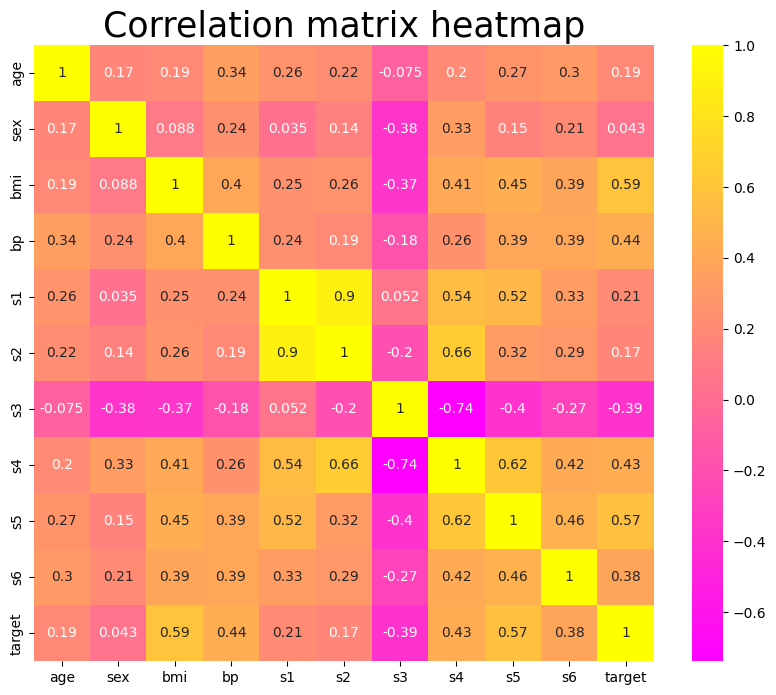

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='spring')
plt.title("Correlation matrix heatmap", fontsize=25);

Based on the correlation matrix of all the features in the diabetes dataset:

- **Correlated Features:** There are several pairs of features that show significant correlation. For example, `s1` and `s2` have a high correlation of **0.9**, indicating they vary together in a predictable manner. Similarly, `s4` and `s3` have a strong negative correlation of **-0.74**, meaning as one increases, the other tends to decrease.

- **Feature with Unusual Behaviour:** `s3` shows unusual behaviour in its correlations with other features. It is negatively correlated with several features, most notably with `s4` (-0.74), indicating an inverse relationship. This unusual behaviour could imply that `s3` plays a distinct role in the physiological processes related to diabetes compared to other biomarkers in the dataset.


### 1.4

We will construct a correlation table comprising all pairwise correlations, ordered by decreasing correlation values. This will assist us in identifying the features necessary for our plots:

In [ ]:
# Constructing a correlation table of all pairwise correlations, ordered by decreasing correlation values

corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Sort the correlation pairs
sorted_corr_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)

# Display the sorted correlation pairs
sorted_corr_pairs

s1      s2    0.896663
s2      s1    0.896663
        s4    0.659817
s4      s2    0.659817
        s5    0.617859
                ...   
target  s3   -0.394789
s5      s3   -0.398577
s3      s5   -0.398577
        s4   -0.738493
s4      s3   -0.738493
Length: 110, dtype: float64

We've constructed a correlation table comprising all pairwise correlations, ordered by decreasing correlation values. The top pairs with the highest positive correlations are:

- `s1` and `s2` with a correlation of 0.896663, indicating a very strong positive relationship.

On the negative side, the pairs with the most significant negative correlations are:

- `s3` and `s4` with a correlation of -0.738493, indicating a strong negative relationship.

These correlations help identify the features that are most strongly related, either positively or negatively.

### Let's plot them:

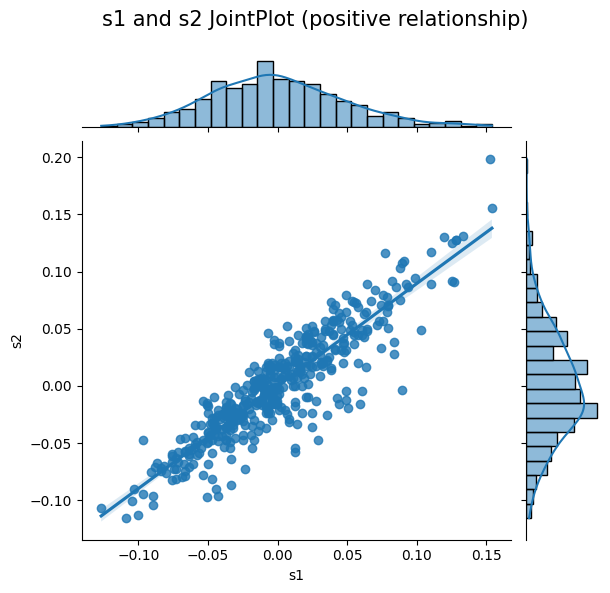

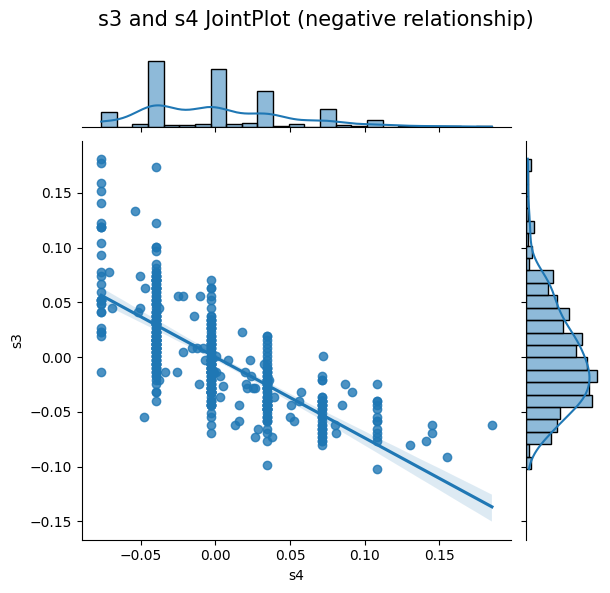

In [ ]:
# Selecting the 2 pairs of features with the highest correlation (positive or negative)
# Ignoring the diagonal (1.0 correlation with themselves) and the target variable correlations

# Create a copy of the correlation matrix without the 'target' column and row
corr_no_target = correlation_matrix.drop('target', axis=0).drop('target', axis=1)

# Find the top 2 absolute correlations (ignoring self-correlation)
top_2_pairs = corr_no_target.abs().unstack().sort_values(kind="quicksort", ascending=False).drop_duplicates()[1:3]

# Extract feature names for the top 2 correlated pairs
top_2_pairs_names = [top_2_pairs.index[i] for i in range(2)]

# Plotting scatter plots with marginal histograms for the first pair
p = sns.jointplot(x=top_2_pairs_names[0][0], y=top_2_pairs_names[0][1], data=df_diabetes, kind="reg", marginal_kws=dict(bins=25, fill=True))
p.fig.suptitle('s1 and s2 JointPlot (positive relationship)', fontsize=15)
p.fig.subplots_adjust(top=0.9)
plt.show()

# Plotting scatter plots with marginal histograms for the second pair
p = sns.jointplot(x=top_2_pairs_names[1][0], y=top_2_pairs_names[1][1], data=df_diabetes, kind="reg", marginal_kws=dict(bins=25, fill=True))
p.fig.suptitle('s3 and s4 JointPlot (negative relationship)', fontsize=15)
p.fig.subplots_adjust(top=0.9)
plt.show()

### 1.5

Based on the correlation analysis and the visualizations, here are two "interesting" trends in the diabetes dataset:

1. **High Correlation Between Biomarkers:** The strong positive correlation between `s1` (total serum cholesterol) and `s2` (low-density lipoproteins) suggests a close relationship between these two biomarkers in the context of diabetes. This might indicate that individuals with diabetes or at risk of diabetes could experience simultaneous increases in these two metrics, suggesting a potential area for further investigation in diabetes management and treatment strategies.

2. **Inverse Relationship Between HDL and Other Biomarkers:** The strong negative correlation between `s3` (high-density lipoproteins, HDL) and `s4` (thyroid-stimulating hormone) reveals an inverse relationship, where higher levels of HDL are associated with lower levels of thyroid-stimulating hormone within the diabetic population. This trend could suggest a protective role of HDL against certain metabolic disturbances common in diabetes, or it might reflect the complex interplay between lipid metabolism and thyroid function in diabetic patients.

These trends highlight the intricate relationships between different metabolic and hormonal factors in diabetes, pointing towards areas that could benefit from further research to understand their implications for diabetes risk, management, and treatment.

### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=3$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

### In general, we need to specify each possible combination of variables (less one, as the probability distribution should sum to 1), so we get: $$(n \cdot m \cdot k) - 1$$

### If in this case $k=3$ then:
### $$ 3 \cdot n \cdot m  - 1 $$

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

### When $(X)$, $(Y)$, and $(Z)$ are independent, their joint probability is given by the product of their individual probabilities, i.e., $(P(X=x, Y=y, Z=z) = P(X=x) \cdot P(Y=y) \cdot P(Z=z))$.

### For a discrete random variable with $(n)$ outcomes, identifying its distribution requires the probabilities for $(n-1)$ outcomes, as the sum of probabilities must equal 1, automatically determining the last outcome's probability.

### Thus, with independence, the total number of parameters needed to describe the joint distribution of $(X)$, $(Y)$, and $(Z)$ is the sum of the parameters for each variable's distribution. Specifically, this is: $$(n-1) + (m-1) + (k-1)$$ parameters.
### Given $(k=3)$, this simplifies to: $$(n-1) + (m-1) + 2$$ or equivalently, $$n + m$$ parameters.

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

### Given $X$ and $Y$ are conditionally independent with respect to $Z$, this implies $P(X,Y|Z) = P(X|Z)P(Y|Z)$. Consequently, the joint probability is expressed as:

### $$P(X, Y, Z) = P(X, Y | Z) P(Z) = P(X|Z)P(Y|Z)P(Z)$$

### With $Z$ presenting $k=3$ distinct outcomes, specifying $P(Z)$ necessitates $k-1$ parameters, similar to the previous section. For every $k$ value of $Z=z_i$, defining $P(X|Z=z_i)$ requires $(n-1)$ parameters, leading to a total of $(n-1)k$ parameters for $P(X|Z)$. For $P(Y|Z)$, $(m-1)k$ parameters are needed for all possible values of $Z$.

### Combining these, the formula is: $$(n-1)k+(m-1)k+(k-1) = (n+m-1)k - 1 = 3(n+m-1) - 1$$

#### 2.D
Give an example for a joint distribution of $\ U, V \ $ and $W$ where $U$ and $V$ are NOT conditionally independent given $W$, but $U$ and $V$ are (unconditionally) independent. Also: $U$ and $V$ are normally distributed ($N(2, 2)$) and $W$ is a coin (2 possible values).

- **Unconditional Independence of $U$ and $V$**: This means that the joint distribution of $U$ and $V$ factors into the product of their marginal distributions, i.e., $f_{U,V}(u,v) = f_U(u) \cdot f_V(v)$, where both $U$ and $V$ follow a normal distribution $N(2, 2)$.
  
- **Conditional Dependence of $U$ and $V$ Given $W$**: This requires that the joint distribution of $U$ and $V$ given $W$ does not factor into the product of their conditional distributions, i.e., $f_{U,V|W}(u,v|w) \neq f_{U|W}(u|w) \cdot f_{V|W}(v|w)$ for at least one value of $w$.

- **$W$ is a binary variable** (representing a coin with 2 possible outcomes, say $0$ and $1$).

### Example Construction

Let $U$ and $V$ be normally distributed random variables with means $\mu = 2$ and variances $\sigma^2 = 2$, hence $U, V \sim N(2, 2)$.

Let $W$ be a binary random variable representing the outcome of a coin toss, with $W = 0$ or $W = 1$ with equal probability.

Define the dependence of $U$ and $V$ on $W$ as follows:

- When $W=0$, $U$ and $V$ are correlated such that $V = U + \epsilon$, where $\epsilon \sim N(0, 1)$. This introduces a dependence between $U$ and $V$ when $W=0$.
  
- When $W=1$, $U$ and $V$ are independent and retain their original $(N(2,2))$ distributions. This means there's no direct dependence or correlation introduced by $(W=1)$, and thus, their conditional distributions given $(W=1)$ do not deviate from their marginal distributions.

For conclusion, this setup illustrates a scenario where $U$ and $V$ are independent when considered without the context of $W$ (as their joint distribution is simply the product of their individual distributions), but are not conditionally independent given $W$, due to the specific dependence introduced between $U$ and $V$ when $W$ takes on certain values. This satisfies the task's conditions by employing a mixture model approach where the dependence structure is modulated by the state of a third variable, $W$.

### Question 3 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 105,000 RCU and a standard deviation of 27,500 RCU.

In [ ]:
mean = 105000
std_dev = 27500

#### 3.A
What percent of people earn less than 50,000 RCU?

#### Explanation:

To find the percentage of people earning less than 50,000 RCU in a normal distribution with a mean of 105,000 RCU and a standard deviation of 27,500 RCU, we can use the cumulative distribution function (CDF) of the normal distribution.

The CDF gives us the probability that a random variable (in our case, an employee's salary) is less than or equal to a certain value.

The CDF of the normal distribution is:
$P(X \leq x) = \frac{1}{2} \left[1 + \text{erf}\left(\frac{x - \mu}{\sigma \sqrt{2}}\right)\right]$

In [ ]:
x = 50000
p = 0.5 * (1 + special.erf((x - mean) / (std_dev * 2**0.5)))

print("The percent of people that earn less than 50,000 RCU is: {:.3f}%".format(p * 100))

The percent of people that earn less than 50,000 RCU is: 2.275%


#### 3.B
What percent of people earn between 50,000 RCU and 77,500 RCU?

#### Explanation:

To find the percentage of people earning between 50,000 RCU and 77,500 RCU in a normal distribution with a mean of 105,000 RCU and a standard deviation of 27,500 RCU, we can use the cumulative distribution function (CDF) of the normal distribution.

$P(50,000 \leq X \leq 77,500) = P(X \leq 77,500) - P(X \leq 50,000)$


In [ ]:
lower_bound = 50000
upper_bound = 77500

prob_lower_bound = stats.norm.cdf(lower_bound, mean, std_dev)
prob_upper_bound = stats.norm.cdf(upper_bound, mean, std_dev)

prob = prob_upper_bound - prob_lower_bound

print("The percent of people that earn between 50,000 and 77,500 RCU is: {:.3f}%".format(prob * 100))

The percent of people that earn between 50,000 and 77,500 RCU is: 13.591%


#### 3.C
What percent of people earn more than 115,000 RCU?

#### Explanation:

To find the percentage of people earning more than 115,000 RCU in a normal distribution with a mean of 105,000 RCU and a standard deviation of 27,500 RCU, we can use the cumulative distribution function (CDF) of the normal distribution.

The CDF gives us the probability that a random variable (in our case, an employee's salary) is less than or equal to a certain value.
To find the probability of earning more than 115,000 RCU, we can find the complementary probability of earning less than or equal to 115,000 RCU and subtract it from 1.

We will calculate the RV Z for 115,000 RCU using the formula:
$z = \frac{x - \mu}{\sigma}$
where:

*   x is the value (115,000 RCU)
*   μ is the mean (105,000 RCU)
*   σ is the standard deviation (27,500 RCU)

Then we will use the CDF of the standard normal distribution to find the probability of earning less than or equal to 115,000 RCU.

Finaly we will subtract this probability from 1 to find the probability of earning more than 115,000 RCU.

In [ ]:
def get_prob_greater_than(value, mean, std_dev, display):
  z = (value - mean) / std_dev

  # Calculate CDF of standard normal distribution to find the probability of less than or equal to 115,000 RCU
  prob_less_than_or_equal = stats.norm.cdf(z)

  # Subtract from 1 to find the probability of more than 115,000 RCU
  prob = 1 - prob_less_than_or_equal

  if display:
    print("The percent of people earning more than {} RCU is: {:.3f}%".format(value, prob * 100))

  return prob

In [ ]:
value = 115000
prob_greater_than = get_prob_greater_than(value, mean, std_dev, display=True)

The percent of people earning more than 115000 RCU is: 35.806%


#### 3.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 150,000 RCU?

#### Explanation:

To find how many employees in the company are expected to earn more than
150,000 RCU, we will use the cumulative distribution function (CDF) of the normal distribution.

We can calculate the probability of an employee earning more than 150,000 RCU by finding the probability from the CDF and then multiplying it by the total number of employees.

In [ ]:
value = 150000
total_employees = 1000

prob_greater_than = get_prob_greater_than(value, mean, std_dev, display=False)

expected_employees_more_than = prob_greater_than * total_employees

print("The expected number of employees that earn more than 150,000 RCU is: ~", round(expected_employees_more_than))

The expected number of employees that earn more than 150,000 RCU is: ~ 51


### Question 4 - CLT for Markov chains

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T =
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

#### Explanation:

The first roll, $X_0$, is uniformly distributed between 1 and 6.
After each roll, the next roll $X_i+1$ is determined according to the row in a transition matrix T that corresponds to the value of the current roll
$X_i$.
We want to construct 1000 trajectories, each consisting of 30 rolls.
Now, regarding the expected average value of all 30 numbers in a trajectory:

Since each roll is uniformly distributed between 1 and 6, the expected value of each roll is the average of the possible outcomes, which is $\frac{{1+2+3+4+5+6}}{6} = 3.5$.

Since the dice rolls are independent of each other, the expected average value of all 30 numbers in a trajectory is also 3.5.

This is because the expected value of the average of a sequence of independent and identically distributed random variables is equal to the expected value of each individual random variable.

Therefore, we expect the average value of all 30 numbers in a trajectory to be
3.5.

In [ ]:
T_matrix = np.array([ [0.4, 0.2, 0.1, 0.0, 0.1, 0.2],
                      [0.2, 0.4, 0.2, 0.1, 0.0, 0.1],
                      [0.1, 0.2, 0.4, 0.2, 0.1, 0.0],
                      [0.0, 0.1, 0.2, 0.4, 0.2, 0.1],
                      [0.1, 0.0, 0.1, 0.2, 0.4, 0.2],
                      [0.2, 0.1, 0.0, 0.1, 0.2, 0.4]])

The function generates a trajectory of states based on a Markovian process with given initial distribution and transition probabilities.

Each state in the trajectory is determined by the previous state according to the transition probabilities specified in the transition matrix T.

In [ ]:
def calc_trajectory_arr(T_matrix, trajectory_length, states, distribution):
    trajectory = []

    current_state = np.random.choice(states, p=distribution)
    trajectory.append(current_state)

    for _ in range(1, trajectory_length):
        previous = trajectory[-1]
        distribution = T_matrix[previous-1]
        current_state = np.random.choice(states, p=distribution)
        trajectory.append(current_state)

    return np.array(trajectory)

In [ ]:
def calc_trajectories_matrix_and_mean_trajectory(T_matrix, trajectories_num, trajectory_length, states, distribution):
    trajectories = []

    for _ in range(trajectories_num):
        trajectory = calc_trajectory_arr(T_matrix, trajectory_length, states, distribution)
        trajectories.append(trajectory)

    trajectories_matrix = np.array(trajectories)
    mean_trajectory = np.mean(trajectories_matrix, axis=1)

    return mean_trajectory

In [ ]:
def get_and_display_mean_std(means):
    empirical_mean = means.mean()
    empirical_std = means.std()

    print(f'The empirical mean is {empirical_mean}')
    print(f'The empirical std is {empirical_std}')

    return empirical_mean, empirical_std

In [ ]:
def plot_normal_fit(mean, std, bins, data_length):
    bin_width = bins[1] - bins[0]
    scale = data_length * bin_width

    x_values = np.linspace(1, 6, 10000)
    y_values = norm.pdf(x_values, mean, std)

    plt.plot(x_values, y_values * scale, '--', linewidth=2, label='Normal Fit')
    plt.legend()

In [ ]:
def display(average_values, bins=20, draw_normal_fit=False, title="Histogram of Average Values of Trajectories"):
    _, bin_edges, _ = plt.hist(average_values, bins=bins, edgecolor='black')
    plt.xlim([1, 6])
    plt.xlabel('Average Value')
    plt.ylabel('Count')
    plt.title(title)

    empirical_mean, empirical_std = get_and_display_mean_std(average_values)

    if draw_normal_fit:
        plot_normal_fit(empirical_mean, empirical_std, bin_edges, len(average_values))

    plt.show()

The empirical mean is 3.496633333333333
The empirical std is 0.5026339500847289


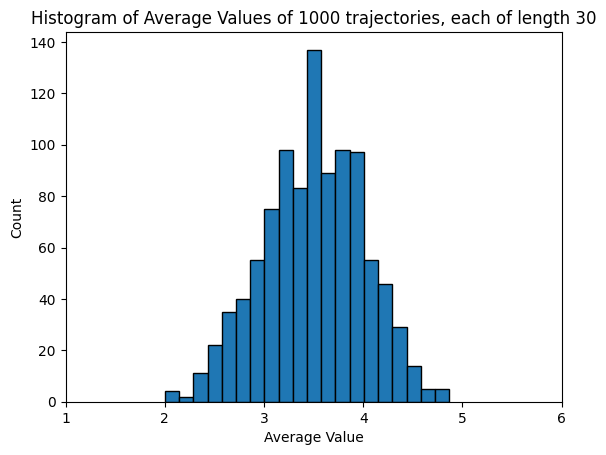

In [ ]:
states = np.array([1, 2, 3, 4, 5, 6])
distribution = np.array([1/6 for _ in range(6)])
means_30 = calc_trajectories_matrix_and_mean_trajectory(T_matrix, 1000, 30, states, distribution)
display(means_30, title="Histogram of Average Values of 1000 trajectories, each of length 30")

As we can see above:
*   The distribution looks like a Normal distribution
*   The empirical mean is ~3.5
*   The empirical std is ~0.48

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?
4. Draw normal fit curves on your two histograms.

#### Explanation:
Same as before:

Since each roll is uniformly distributed between 1 and 6, the expected value of each roll is the average of the possible outcomes, which is $\frac{{1+2+3+4+5+6}}{6} = 3.5$.

Since the dice rolls are independent of each other, the expected average value of all 500 numbers in a trajectory is also 3.5.

This is because the expected value of the average of a sequence of independent and identically distributed random variables is equal to the expected value of each individual random variable.

Therefore, we expect the average value of all 500 numbers in a trajectory to be
3.5.

The empirical mean is 3.502284
The empirical std is 0.12362057815752199


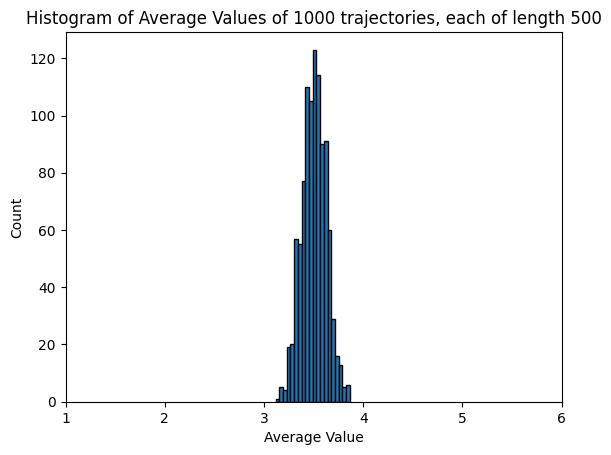

In [ ]:
means_500 = calc_trajectories_matrix_and_mean_trajectory(T_matrix, 1000, 500, states, distribution)
display(means_500, title="Histogram of Average Values of 1000 trajectories, each of length 500")

As we can see above:
*   The distribution looks like a Normal distribution
*   The empirical mean is ~3.5
*   The empirical std is ~0.12

The empirical mean is 3.496633333333333
The empirical std is 0.5026339500847289


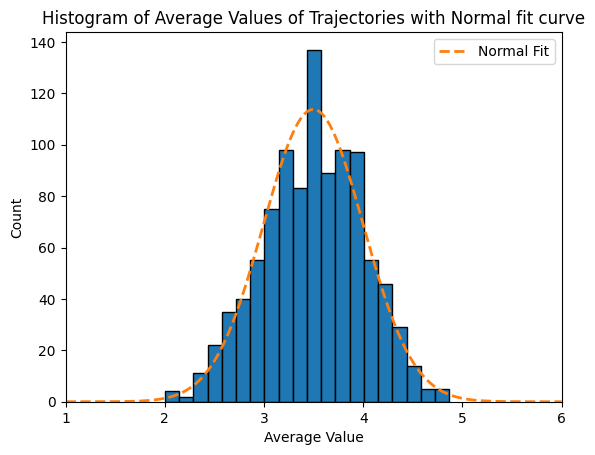

In [ ]:
display(means_30, draw_normal_fit=True, title="Histogram of Average Values of Trajectories with Normal fit curve")

The empirical mean is 3.502284
The empirical std is 0.12362057815752199


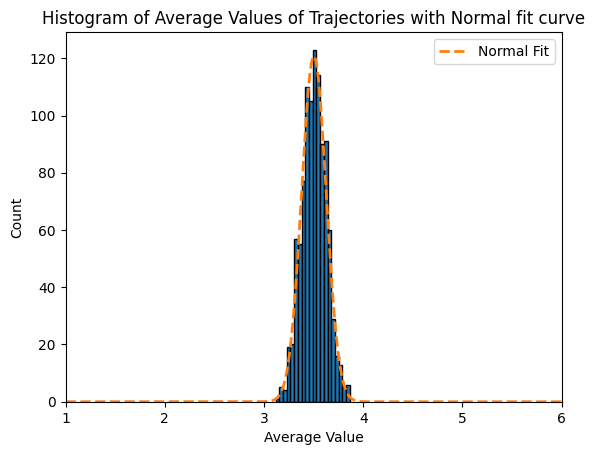

In [ ]:
display(means_500, draw_normal_fit=True, title="Histogram of Average Values of Trajectories with Normal fit curve")

#### 4.C
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$.

Compute the values for our case.

#### Explanation:

The function calculate_cov iteratively computes the covariance over 500 iterations for the given transition matrix T_matrix and initial probability distribution pi_0, where each iteration calculates the covariance between the initial state E_x0 and the state after i transitions E_xi, by summing the pairwise products of states weighted by their probabilities and transition probabilities, then subtracting the product of the expected initial state and expected state after i transitions.

We used this formula to calculate the $Cov(X_0,X_i)$:

$Cov(X_0,X_i) = E(X_0X_i) - E(X_0)E(X_i)$

In [ ]:
def calculate_cov(T_matrix, pi_0):
    iteration = 500
    covariance_history = np.empty(iteration)

    for i in range(1, iteration + 1):
        T_power = np.linalg.matrix_power(T_matrix, i)
        E_x0 = np.dot(np.dot(T_matrix, pi_0), states)

        pi_i = pi_0 @ T_power
        E_xi = np.dot(np.dot(T_matrix, pi_i), states)

        E_x0xi = sum(k1 * k2 * pi_0[k1-1] * T_power[k1-1][k2-1] for k1 in states for k2 in states)
        covariance = E_x0xi - (E_x0 * E_xi)

        covariance_history[i-1] = covariance
    return covariance_history

In [ ]:
pi_0 = distribution
covariance_history = calculate_cov(T_matrix, pi_0)

covariance_history

array([ 1.11666667e+00,  5.16666667e-01,  2.52666667e-01,  1.25466667e-01,
        6.25866667e-02,  3.12666667e-02,  1.56282667e-02,  7.81314667e-03,
        3.90637867e-03,  1.95315067e-03,  9.76567627e-04,  4.88282275e-04,
        2.44140830e-04,  1.22070353e-04,  6.10351644e-05,  3.05175798e-05,
        1.52587894e-05,  7.62939459e-06,  3.81469728e-06,  1.90734863e-06,
        9.53674318e-07,  4.76837156e-07,  2.38418579e-07,  1.19209290e-07,
        5.96046412e-08,  2.98023206e-08,  1.49011612e-08,  7.45058237e-09,
        3.72529207e-09,  1.86264515e-09,  9.31319022e-10,  4.65661287e-10,
        2.32828867e-10,  1.16415322e-10,  5.82094373e-11,  2.91020541e-11,
        1.45536916e-11,  7.27595761e-12,  3.63620245e-12,  1.81721305e-12,
        9.07718345e-13,  4.52970994e-13,  2.27373675e-13,  1.10134124e-13,
        5.68434189e-14,  2.66453526e-14,  1.42108547e-14,  7.10542736e-15,
        7.10542736e-15,  0.00000000e+00, -1.77635684e-15,  0.00000000e+00,
        1.77635684e-15,  

### Question 5 - Distributions

Let $X$ be a random variable. Consider the number $q$ so that $P(X\le q)=0.8$ (assume that such a value exists).

Consider a sample $\vec{x}(n) = x_1,...,x_n$ sampled independently from $X$. Denote the sorted observations by: $a_1 \le a_2 \le ... \le a_n$. Also assume that $n \ge 100$.

Let $R(\vec{x}(n))$ be the largest index $i \in {1,...,n}$ such that $a_i \le q$. If $a_1 > q$ then $R = 0$.

1. What is $P(R = 0)$?
1. What is the distribution of $R$?
1. Given $n$, write code that computes an index $\lambda (n)$ so that $P(a_{\lambda (n)} \le q) \ge 0.9$ and $P(a_{\lambda (n)+1} \le q) < 0.9$.
1. Let $X \sim Unif(0,1)$, $q$ as above and $n=100$. Compute $\lambda (n)$ as above. Run 200 experiments that calculate $a_{\lambda (n)}$ for independent drawing from $X$. How many times did you observe $a_{\lambda (n)} \le q$?

#### Explanation:

1. As mentioned above, if $a_1 > q$, then $R = 0$.

  $\vec{x}(n) = x_1,...,x_n$ sampled independently.

  Therefore, the probability that the first observation will be greater than $q$, is equal to $P(X > q) = 1 - P(X\le q)= 1 - 0.8 = 0.2$.

  As we mentioned above, the observations are sorted and independent, therefore we have that:
  $P(X_1 > q, X_2 > q, ... , X_n > q) = P(X_1 > q)P(X_2 > q)...P(X_n > q) = 0.2^n$

2. The distribution of R is Binomial with parameters n and $p = 0.8$, where n   is the number of observations in the sample.

  We will define success as $(x_i\le q)$ for i=1,2,…,k, then R will represent the number of successes in the sample $\vec{x}(n)$.

  $P(R=k) = \binom{n}{k} \cdot p^k \cdot (1 - p)^{n - k} = \binom{n}{k} \cdot 0.8^k \cdot (0.2)^{n - k}$


  3. To find an index $\lambda (n)$ such that $P(a_{\lambda (n)} \le q) \ge 0.9$ and $P(a_{\lambda (n)+1} \le q) < 0.9$, we can use the percent point function (PPF) of the cumulative distribution function (CDF) of the binomial distribution.
  
  The PPF provides the inverse operation of the CDF, allowing us to find the index such that the specified probability is achieved.

  As noted above: $a_1 \le a_2 \le ... \le a_n$ are the sorted observations.
  
  Therefore, we can treat R as the CFD, and $\lambda (n)$ as the inverse of R, which means the PPF.

In [ ]:
n = 100

In [ ]:
def find_lambda(n):
    return int(st.binom.ppf(q = 1 - 0.9, n = n, p = 0.8))

In [ ]:
lambda_n = find_lambda(n)

print("For n = 100, Index lambda(n) is:", lambda_n)

For n = 100, Index lambda(n) is: 75


4. $X \sim Unif(0,1)$, and $n=100$.
Then, for any specific value q within this interval, the probability $P(X\le q)$ is equal to q itself.

  Therefore, q = 0.8.

In [ ]:
def run_experiments(n, q, experiments_num):
    count_a_lambda_leq_q = 0 # Count how many times a_lambda(n) <= q

    for _ in range(experiments_num):
        samples = np.random.uniform(0, 1, size=n)
        sorted_samples = np.sort(samples)

        lambda_n = find_lambda(n)
        a_lambda = sorted_samples[lambda_n - 1]

        if a_lambda <= q:
            count_a_lambda_leq_q += 1

    return count_a_lambda_leq_q

In [ ]:
q = 0.8
experiments_num = 200

a_lambda_leq_q = run_experiments(n, q, experiments_num)

print("The number of a_lambda <= q is:", a_lambda_leq_q)

The number of a_lambda <= q is: 185
